In [1]:
import sys
sys.prefix

'/Users/adamjedrzejewski/opt/anaconda3/envs/suml4'

In [2]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

/Users/adamjedrzejewski/opt/anaconda3/envs/suml4/lib/python3.9/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [5]:
path = Path('./dataset')

In [6]:
  data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [7]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)

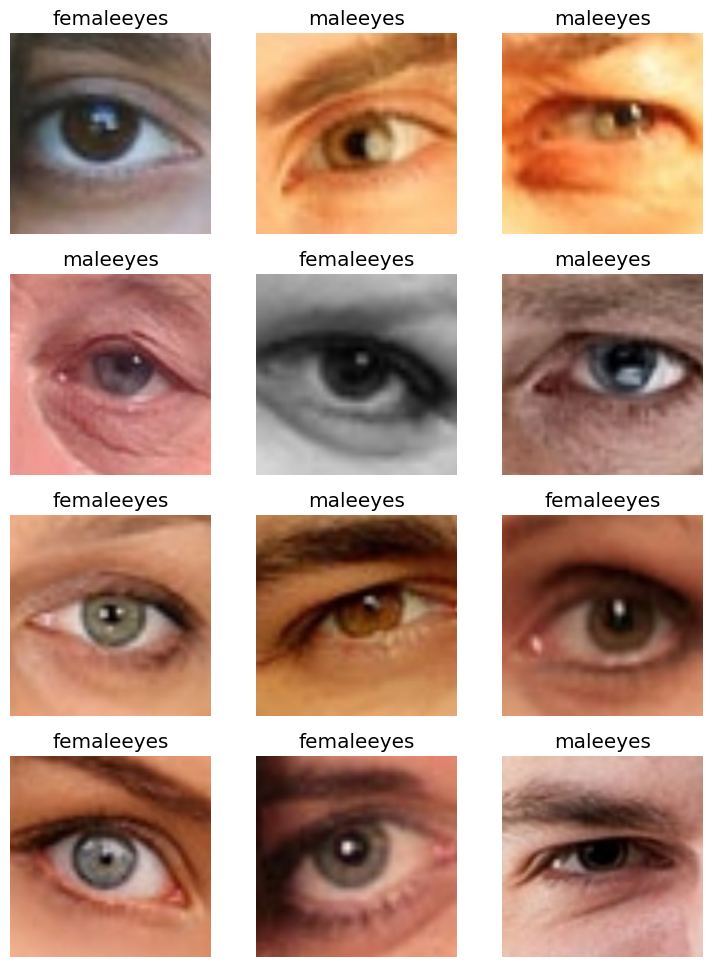

In [8]:
dls.valid.show_batch(max_n=12, nrows=4)

In [9]:
learn = vision_learner(dls, alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/adamjedrzejewski/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [10]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.485897,0.309448,0.866377,06:00


In [11]:
learn.export(fname='eye_model.pkl')

In [12]:
learn.validate()

(#2) [0.30944833159446716,0.8663774132728577]